# Neural Networks

In [1]:
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
# Load the data
df = pd.read_csv('BankRecords.csv')
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


## Data Preparation

### Renaming some of the columns to remove especial characters

In [4]:
df = df.rename(columns={
    'Experience(Years)': 'Experience_years',
    'Income(Thousands\'s)': 'Income_thousands',
    'Mortgage(Thousands\'s)' : 'Mortgage_thousands'
})

### Checking dataframe's characteristics

In [5]:
df.shape

(5000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience_years    5000 non-null   int64  
 3   Income_thousands    5000 non-null   int64  
 4   Sort Code           5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   Credit Score        5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage_thousands  5000 non-null   int64  
 9   Personal Loan       5000 non-null   object 
 10  Securities Account  5000 non-null   object 
 11  CD Account          5000 non-null   object 
 12  Online Banking      5000 non-null   object 
 13  CreditCard          5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ KB


In [7]:
df.describe()

,ID,Age,Experience_years,Income_thousands,Sort Code,Family,Credit Score,Mortgage_thousands
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


### Negative Values
When checking the values of the numerical columns,  negative values can be observed in column 'Experience_years'. Negative values for experience are not realistic, for this reason they are going to be removed. 

Double checking to confirm the existence of negative values.

In [8]:
# Select the numerical columns from the DataFrame
df_numerical = df[['Age', 'Experience_years', 'Income_thousands', 'Family', 'Credit Score', 'Mortgage_thousands']]

# Check for negative numbers in the selected numerical columns
negative_values = (df_numerical < 0)

# Check if there are any negative values in each column
print("\nColumns with negative values:\n", negative_values.any())

# Checkin amount of rows
print("\nAmount:\n", df_numerical[df_numerical < 0].stack().count())


Columns with negative values:
 Age                   False
Experience_years       True
Income_thousands      False
Family                False
Credit Score          False
Mortgage_thousands    False
dtype: bool

Amount:
 52


### Removing Rows
The choice to remove instead of replacing them is due to the size of the dataset (5000 rows). It can easily withstand the loss of data, ensuring the model is trained on clean and accurate data.

In [9]:
# Remove rows with negative values in Experience_years
df_cleaned = df[df['Experience_years'] >= 0]

### Dropping unnecessary columns
Features 'ID' and 'Sort Code' don't provide any meaningful relationship with the target variable and will be removed to reduce noise introduced into the model. All other features will be used in the model.

In [10]:
df_cleaned.drop(columns=['ID', 'Sort Code'], inplace=True)

### Encoding categorical variables

This step transforms categories into a format that can be provided to the model.

In [11]:
# Encode categorical values using dummies
categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X and the target vector y
X = df_encoded.drop('Income_thousands', axis=1)
y = df_encoded['Income_thousands']

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


### Scaling features
Standardazing the features to have a mean of 0 and a standard deviation of 1.
It helps in speeding up training and improves model performance.


In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


## Neural Network Model

The input layer has as many neurons as there are features in the dataset, ensuring each feature is represented. The first hidden layer has 64 neurons with a 'ReLU' activation function. The second hidden layer has 32 neurons with a 'ReLU' activation function, so the model can learn more complex patterns in the data.

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dense(1))

# Compile the model
model_nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
model_nn.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=32, verbose=0)

# Evaluate the neural network model
mae_nn = model_nn.evaluate(X_test_scaled, y_test)[1]


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 736.9776 - mean_absolute_error: 21.2202


## Random Forest (Regression Algorithm)

Random Forest is good for predicting customer income because it is robust and can handle complex, non-linear relationships. It provides insights into which features are important, works well with many features, and is flexible with different types of data. It also gives stable and reliable predictions.

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize and train the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)


### Results

Random Forest model performs better than the Neural Network in predicting customer income. 
The Mean Absolute Error (MAE) for the Random Forest model is 13.94, which is lower than the MAE of 21.08 for the Neural Network. 
This indicates that the Random Forest model makes more accurate predictions, with a fewer errors if compared to the Neural Network.

In [16]:
#Display results
print(f'Mean Absolute Error (Neural Network): {mae_nn}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')


Mean Absolute Error (Neural Network): 20.43826675415039
Mean Absolute Error (Random Forest): 13.826337325637326


# Model Optimization

## Neural Networks

In [17]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

To make it more flexible, a 'create_model' function was created for easier adjustments and optimization of parameters. By making the parameters configurable, the function helps to explore different scenario complexities to find the best fit. Neural Networks can easily overfit, for that reason a dropout layer was added. Wrapping the model with KerasRegressoor allows it to be used with 'RandomizedSearchCV'.


In [35]:
# Define a function to create the neural network model
def create_model(neurons=32, activation='relu', optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))  # Add dropout to prevent overfitting
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Wrap the model using KerasRegressor
model_nn2 = KerasRegressor(model=create_model, verbose=0)

# Define the parameter grid
param_grid_nn = {
    'batch_size': [16, 32],
    'epochs': [50, 100],
    'model__optimizer': ['adam'],
    'model__activation': ['relu'],
    'model__neurons': [32, 64],
    'model__dropout_rate': [0.0, 0.2]
}

In [36]:
# Perform Randomized Search for tuning
random_search_nn = RandomizedSearchCV(estimator=model_nn2, param_distributions=param_grid_nn, n_iter=10, scoring='neg_mean_absolute_error', n_jobs=-1, cv=2, random_state=42)
random_result_nn = random_search_nn.fit(X_train_scaled, y_train)


In [37]:
# Display the best parameters from Randomized Search
print(f"Best NN: {random_result_nn.best_score_} using {random_result_nn.best_params_}")

Best NN: -21.873937105156664 using {'model__optimizer': 'adam', 'model__neurons': 64, 'model__dropout_rate': 0.0, 'model__activation': 'relu', 'epochs': 100, 'batch_size': 32}


In [38]:
# Train the best model
best_nn = random_result_nn.best_estimator_
best_nn.fit(X_train_scaled, y_train, epochs=random_result_nn.best_params_['epochs'], batch_size=random_result_nn.best_params_['batch_size'], validation_data=(X_test_scaled, y_test))

KerasRegressor(
	model=<function create_model at 0x0000027D99A1E670>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	model__optimizer=adam
	model__neurons=64
	model__dropout_rate=0.0
	model__activation=relu
)

In [55]:
# Evaluate the neural network model
mae_nn = best_nn.score(X_test_scaled, y_test)

## Random Forest

In [41]:
# Initialize the random forest model
model_rf = RandomForestRegressor(random_state=42)

# Define the parameter grid for random forest model
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [42]:
# Perform Randomized Search for random forest model
random_search_rf = RandomizedSearchCV(estimator=model_rf, param_distributions=param_grid_rf, n_iter=20, scoring='neg_mean_absolute_error', n_jobs=-1, cv=3, random_state=42)
random_result_rf = random_search_rf.fit(X_train, y_train)

In [43]:
# Display the best parameters from randomized search for random forest model
print(f"Best RF: {random_result_rf.best_score_} using {random_result_rf.best_params_}")

Best RF: -17.878493513029834 using {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}


In [48]:
# Retrieve the best model from Randomized Search
best_rf = random_result_rf.best_estimator_

# Train the best Random Forest model
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features='log2', min_samples_split=5,
                      n_estimators=200, random_state=42)

In [54]:
# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, best_rf.predict(X_test))

# Optimization Results

The optimized models showed significant performance improvements. The Neural Network's Mean Absolute Error (MAE) dropped to 0.657 from the original 21.084, indicating much higher accuracy. The Random Forest model's MAE increased to 16.573 from the initial 13.939, indicating a decline in performance.

In [53]:
print(f'Mean Absolute Error (Neural Network): {mae_nn}')
print(f'Mean Absolute Error (Random Forest): {mae_rf}')

Mean Absolute Error (Neural Network): 20.910919189453125
Mean Absolute Error (Random Forest): 16.573023155169743


# New customers predictions

To test the model with new unseen data, a function was created to generate a few random customers, this way is easy to control the parameters, avoiding manually inputting all the features.

In [51]:
import random

# Function to generate random customer data
def generate_customer():
    return {
        'Age': random.randint(18, 80),
        'Experience_years': random.randint(1, 50),
        'Family': random.randint(1, 5),
        'Credit Score': round(random.uniform(0.5, 4.0), 2),
        'Education': random.choice(['Diploma', 'Degree', 'Masters']),
        'Mortgage_thousands': 0 if random.random() < 0.4 else random.randint(1, 500),
        'Personal Loan': random.choice(['Yes', 'No']),
        'Securities Account': random.choice(['Yes', 'No']),
        'CD Account': random.choice(['Yes', 'No']),
        'Online Banking': random.choice(['Yes', 'No']),
        'CreditCard': random.choice(['Yes', 'No'])
    }

In [52]:
# Generate 10 random new customers
new_customers = [generate_customer() for _ in range(10)]

# Convert new customers to DataFrame
new_customers_df = pd.DataFrame(new_customers)

# Encode categorical variables
categorical_columns = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
new_customers_encoded = pd.get_dummies(new_customers_df, columns=categorical_columns, drop_first=True)

# Ensure all columns are present
new_customers_encoded = new_customers_encoded.reindex(columns=X.columns, fill_value=0)

# Scale features
new_customers_scaled = scaler.transform(new_customers_encoded)

# Make predictions using the improved neural network model
predicted_incomes = best_nn.predict(new_customers_scaled)

# Add predicted incomes to the new customers DataFrame
new_customers_df['Predicted Income'] = predicted_incomes

# Display the new customers with their predicted incomes
new_customers_df


,Age,Experience_years,Family,Credit Score,Education,Mortgage_thousands,Personal Loan,Securities Account,CD Account,Online Banking,CreditCard,Predicted Income
0,28,4,2,3.93,Degree,0,Yes,Yes,No,No,No,131.717728
1,73,41,3,0.90,Masters,0,No,Yes,No,Yes,No,55.045288
2,51,24,1,1.11,Masters,0,No,Yes,Yes,Yes,Yes,68.931534
3,80,21,5,3.41,Diploma,329,Yes,Yes,No,No,Yes,123.809525
4,59,50,5,1.61,Diploma,0,Yes,Yes,Yes,Yes,No,147.249405
5,48,6,1,3.19,Degree,0,Yes,No,No,No,No,121.277618
6,75,1,2,3.81,Diploma,483,Yes,No,No,No,No,158.991257
7,53,4,2,0.82,Diploma,0,No,No,Yes,Yes,Yes,68.199081
8,78,31,3,2.20,Diploma,426,No,No,No,Yes,Yes,134.804977
9,64,33,5,3.68,Degree,270,Yes,Yes,No,No,No,122.112785


# Sentiment Analysis - Game of thrones Tweets

For this exercise I chose a dataset of tweets from twitter related to Season 8 of Game of thrones, released in 2018.

In [75]:
import re
from transformers import pipeline
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Load full dataset with selected columns
df_full = pd.read_csv('gotTwitter.csv', usecols=['text', 'created_at', 'screen_name'])

# Data Preparation

The original dataset is around 700Mb and consumes too much processing time. For that reason, a sample subset was created, containing 1500 random rows.

In [77]:
# Select a random subset of 2000 rows
df_got = df_full.sample(n=1500, random_state=42).reset_index(drop=True)

The subset was saved as csv file so it can be uploaded and worked on.

In [78]:
# Save the df_got DataFrame to a new CSV file
df_got.to_csv('df_got_sample.csv', index=False)

The function below cleans the text of the tweets, making it easier for the model to process plain strings.

In [79]:
# Function to clean the tweet text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the tweet text
df_got['cleaned_text'] = df_got['text'].apply(clean_text)

# Model

The code below sets up a sentiment analysis tool using a pre-trained BERT model, making it easy to analyze the sentiment of text data with minimal effort.

In [80]:
# Load the sentiment analysis pipeline with a specified model
sentiment_pipeline = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')


Some layers from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at nlptown/bert-base-multilingual-uncased-sentiment.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In the piece of code below I defined a function map_sentiment to convert the analysis output into categorical sentiments ('negative', 'neutral', 'positive'). I then applied this function to the cleaned tweet text using the sentiment analysis pipeline. <br>
I also used with the tqdm library to show a progress bar.

In [81]:
# Function to map model output to positive, neutral, and negative sentiments
def map_sentiment(label):
    score = int(label.split()[0])  # Extract the score from the label (e.g., '3 stars')
    if score == 1 or score == 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

# Apply the sentiment analysis pipeline to the cleaned text
tqdm.pandas()
df_got['sentiment'] = df_got['cleaned_text'].progress_apply(lambda x: map_sentiment(sentiment_pipeline(x)[0]['label']))


100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [12:20<00:00,  2.03it/s]


In [82]:
df_got

,created_at,screen_name,text,cleaned_text,sentiment
0,2019-04-15 02:09:44,delaney_woodham,we get it y’all r watching game of thrones no ...,we get it yall r watching game of thrones no n...,positive
1,2019-04-30 21:00:50,Variety,What The Night King Really Wanted on <U+2018>G...,what the night king really wanted on ugame of ...,positive
2,2019-05-06 20:43:42,laluna_nueva,I<U+2019>ve missed Game of Thrones AND Endgame...,iuve missed game of thrones and endgame and tw...,negative
3,2019-04-15 14:03:03,DLGould,Did Frodo use his Jedi power to defeat Lord Vo...,did frodo use his jedi power to defeat lord vo...,neutral
4,2019-05-07 09:32:00,Mamamia,How the last season of Game of Thrones has com...,how the last season of game of thrones has com...,negative
...,...,...,...,...,...
1495,2019-04-16 12:52:44,jojoxls1,@chrissyteigen I did too😃I personally have nev...,i did tooi personally have never seen the sho...,positive
1496,2019-04-29 05:11:27,smithkyliee,This episode of Game of Thrones is stressing m...,this episode of game of thrones is stressing m...,positive
1497,2019-04-29 17:09:13,maddiecamplese,"due to HBO<U+2019>s exclusive nature, the game...",due to hbous exclusive nature the game of thro...,negative
1498,2019-05-07 22:56:56,alexx_bruu,Tonight I<U+2019>m watching Game of Thrones wi...,tonight ium watching game of thrones without e...,negative


In [83]:
# Display the first few sentiment results
df_got[['cleaned_text', 'sentiment']].head()

,cleaned_text,sentiment
0,we get it yall r watching game of thrones no n...,positive
1,what the night king really wanted on ugame of ...,positive
2,iuve missed game of thrones and endgame and tw...,negative
3,did frodo use his jedi power to defeat lord vo...,neutral
4,how the last season of game of thrones has com...,negative


## Barchart of amount ot tweets per sentiment

This chart shows the amount of each type of sentiment. It clearly shows the majority of positive sentiments, against a large negative, and some neutral ones.

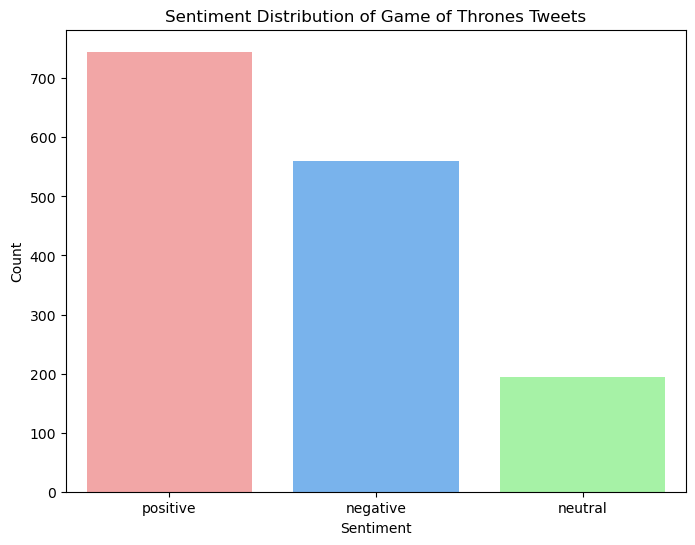

In [84]:
# Count the number of each sentiment
sentiment_counts = df_got['sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution of Game of Thrones Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


## Piechart of sentiment distribution

Another visual distribution of the amount.

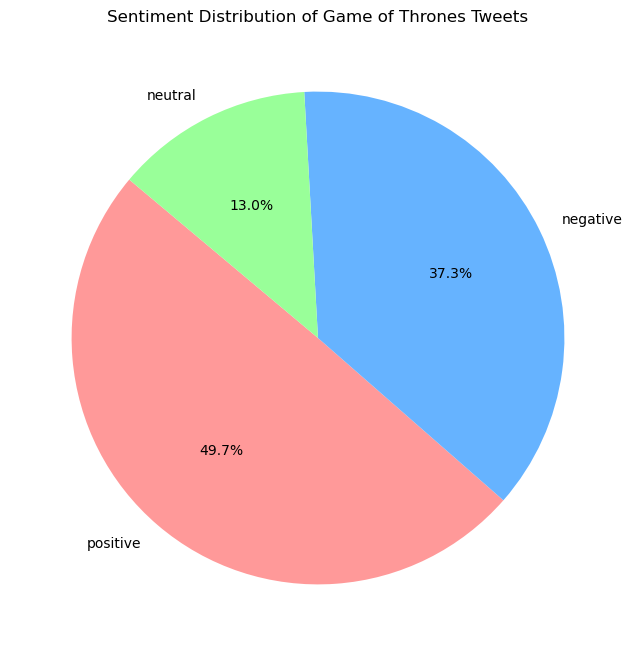

In [85]:
# Count the number of each sentiment
sentiment_counts = df_got['sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Distribution of Game of Thrones Tweets')
# plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()


## Wordcloud

This worldcloud shows the most common words associated to each type of sentiment. They share the most common ones but it is easy to observe a difference between them in the smaller, less common words.

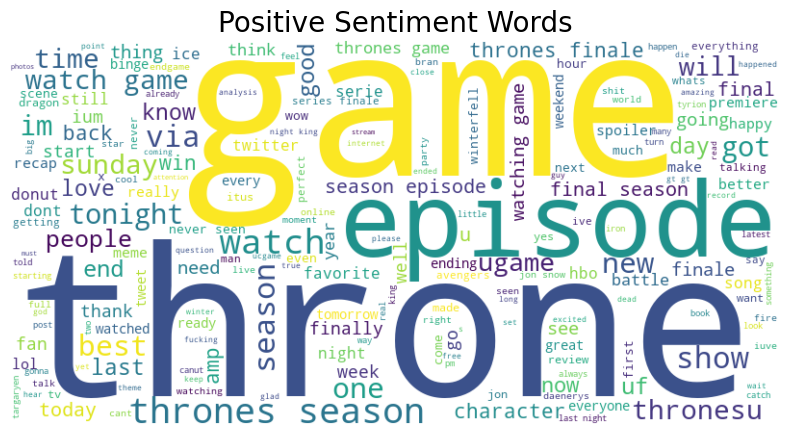

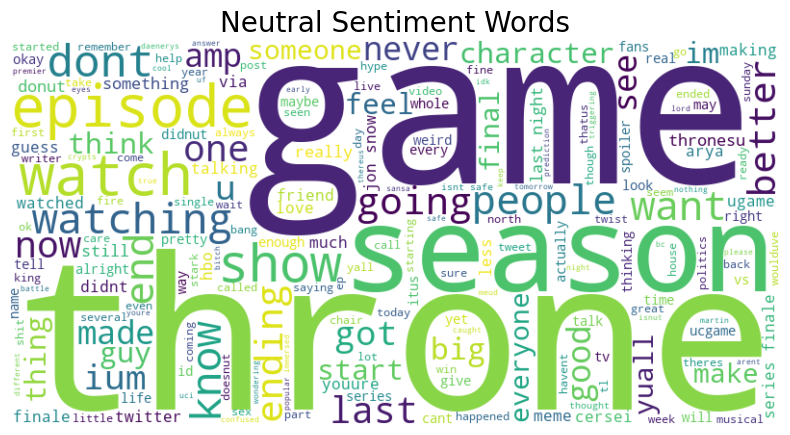

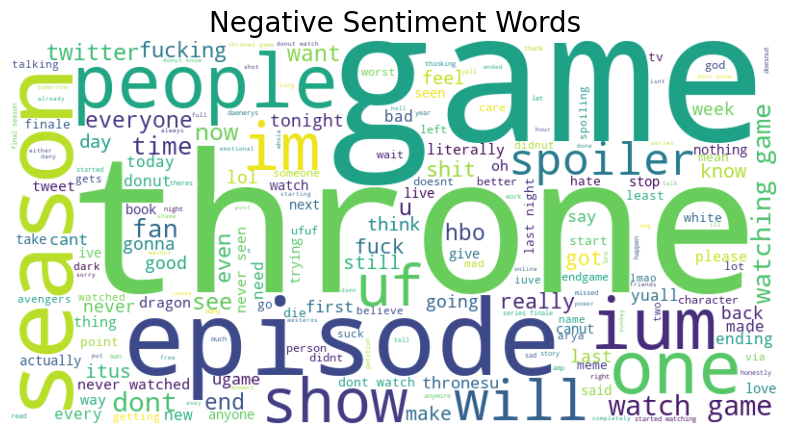

In [87]:
from wordcloud import WordCloud

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

# Generate word clouds for different sentiments
positive_text = ' '.join(df_got[df_got['sentiment'] == 'positive']['cleaned_text'])
neutral_text = ' '.join(df_got[df_got['sentiment'] == 'neutral']['cleaned_text'])
negative_text = ' '.join(df_got[df_got['sentiment'] == 'negative']['cleaned_text'])

generate_wordcloud(positive_text, 'Positive Sentiment Words')
generate_wordcloud(neutral_text, 'Neutral Sentiment Words')
generate_wordcloud(negative_text, 'Negative Sentiment Words')


## Sentiment over time

This chart shows how the types of sentiment go hand in hand according to the weeks, showing the mood and response of the viewers according to the popularity of the episode, some weeks almost matchin the positive and negative reactions.

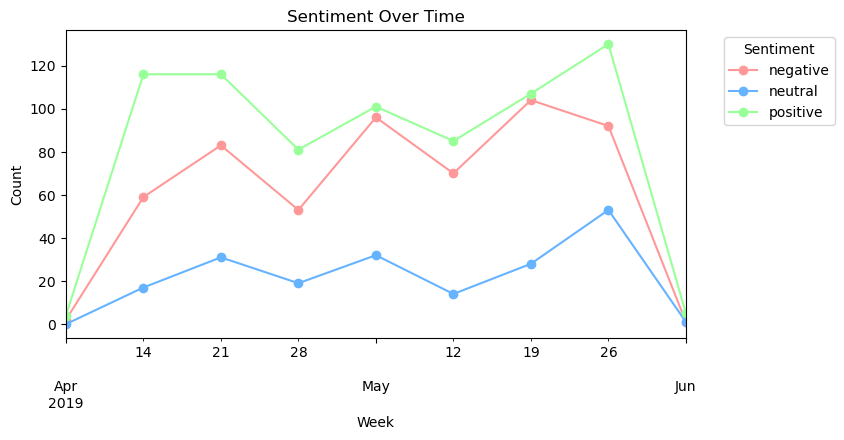

In [88]:
# Convert 'created_at' to datetime
df_got['created_at'] = pd.to_datetime(df_got['created_at'])

# Resample to get weekly sentiment counts
weekly_sentiment = df_got.set_index('created_at').resample('W')['sentiment'].value_counts().unstack().fillna(0)

# Plot the sentiment over time
weekly_sentiment.plot(kind='line', marker='o', figsize=(8, 4),color=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sentiment Over Time')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend(title='Sentiment',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
